# Exploratory Data Analysis (EDA) on Titanic Dataset

## 1. Introduction
This project performs Exploratory Data Analysis (EDA) on the Titanic dataset to identify patterns, relationships, and key factors influencing passenger survival.
### Objective:
- Understand data distribution

- Identify relationships between variables

- Detect trends and correlations

- Extract meaningful insights


## 2. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Data Overview

In [6]:
df = pd.read_csv("titanic.csv")

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. Data Cleaning

 - **Handling missing values**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df['Age'].fillna(df['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
df['Age'].isnull().sum()

0

In [20]:
df['Cabin'].isnull().sum()

687

In [22]:
df.drop('Cabin', axis=1, inplace=True)

In [24]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [30]:
df['Embarked'].fillna(df['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- Filled missing Age values with median

- Filled missing Embarked values with mode

- Dropped Cabin column due to excessive missing data

 **Checking for Duplicates**

In [34]:
df.duplicated().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [38]:
df['FamilySize']=df['SibSp']+df['Parch']+1

## 5. Univariate Analysis

### Age Distribution

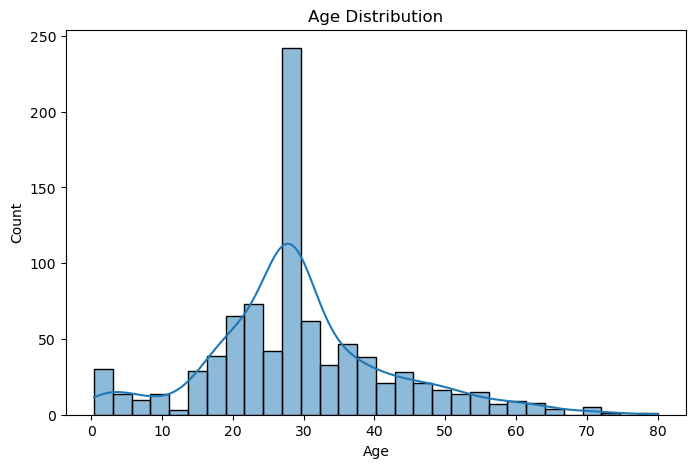

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins = 30, kde=True)
plt.title("Age Distribution")
plt.show()

- Most passengers were between 20–40 years.

- Distribution slightly right-skewed.

- Few elderly passengers.

### Fare Distribution

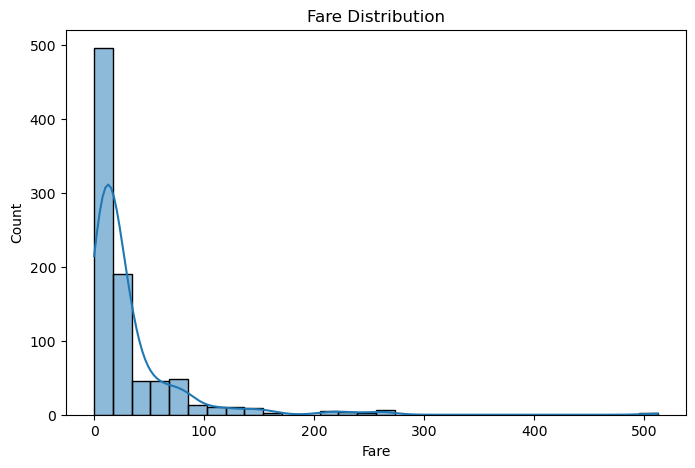

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins = 30, kde = True)
plt.title("Fare Distribution")
plt.show()

- Highly right-skewed distribution.

- Majority paid low fares.

- Few passengers paid extremely high fares.

## 6. Bivariate Analysis

### Age vs Survival

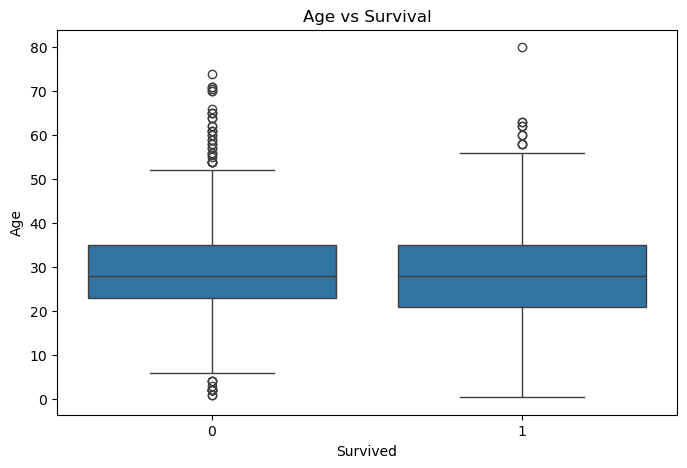

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

- Survivors slightly younger on average.

- Age spread similar across both groups.

- Some outliers present.

### Gender vs Survival

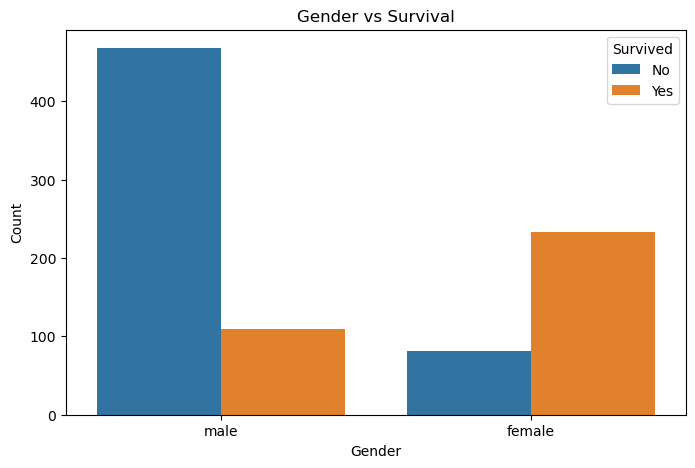

In [121]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Gender vs Survival")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

The plot shows that female passengers had a significantly higher survival rate compared to male passengers. While the number of male passengers was higher overall, the majority of survivors were female. This suggests that gender played a major role in survival during the Titanic disaster.

### Fare vs Survival

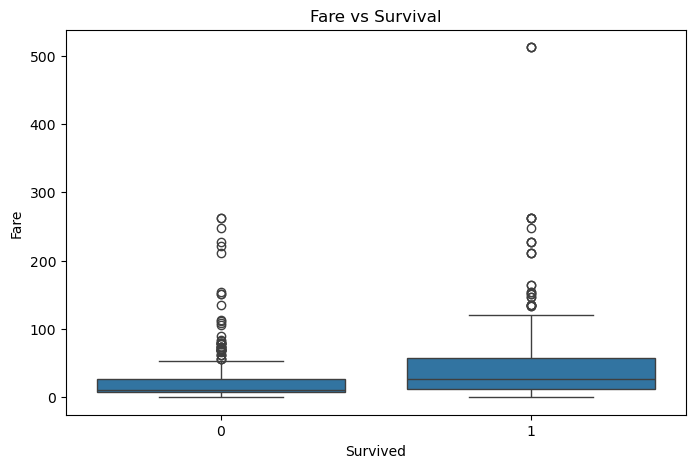

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

- Survivors paid significantly higher fares.

- Many extreme high-fare outliers among survivors.

## 7. Relationship Between Variables

### Age vs Fare by Survival

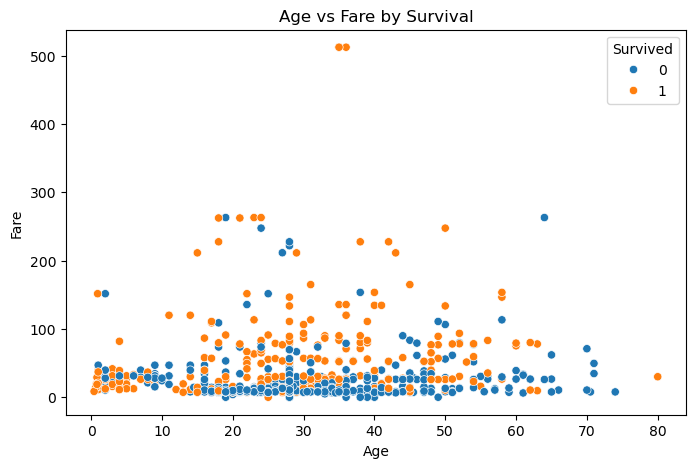

In [64]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Fare', hue = 'Survived', data= df)
plt.title("Age vs Fare by Survival")
plt.show()

- No strong relationship between Age and Fare.

- High-fare passengers more likely to survive.

- Survival clustered among higher fare values and lower age group.

## 8. Correlation Analysis

### Correlation Heatmap

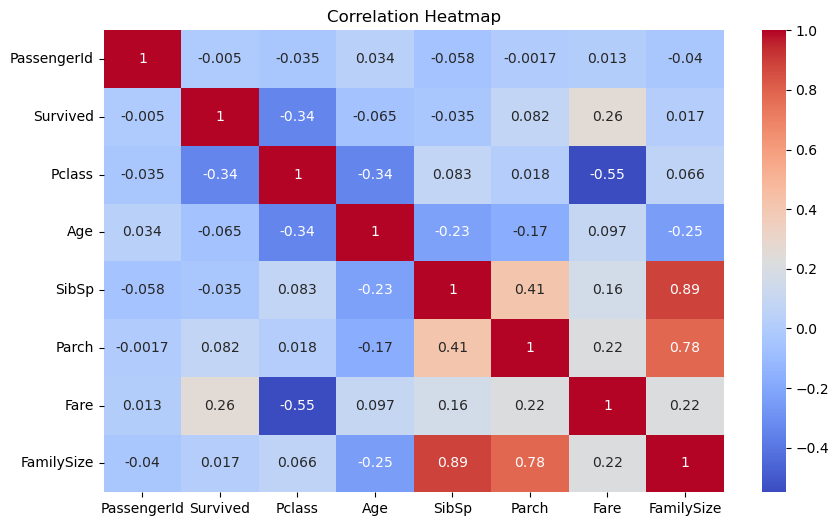

In [72]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

- Survival positively correlated with Fare.

- Survival negatively correlated with Pclass.

- FamilySize shows mild influence.

- Age has weak correlation with Survival.

## 9. Pairplot Analysis (Multi-variable Relationships)

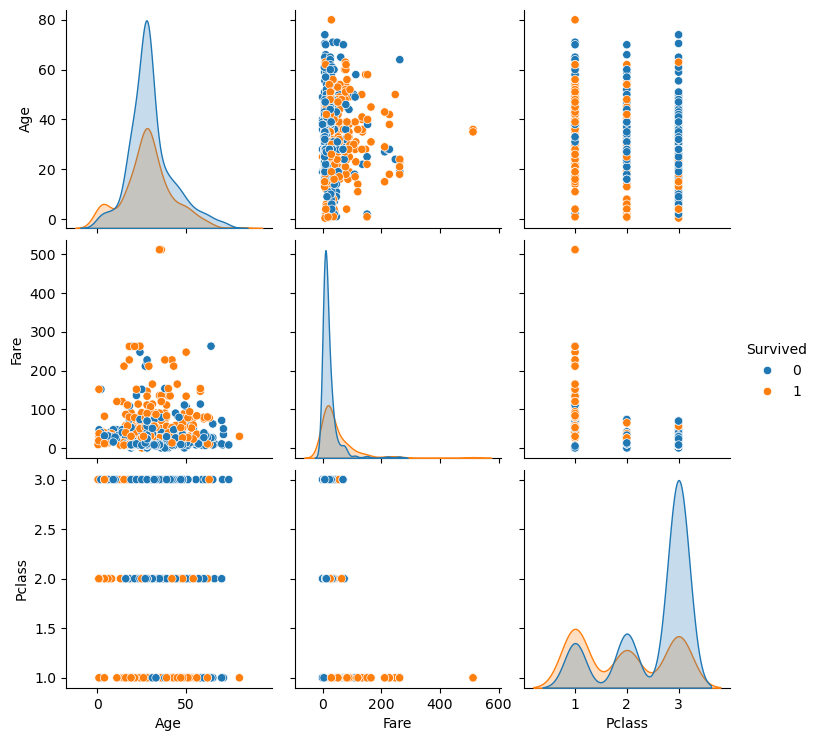

In [78]:
sns.pairplot(df[['Survived','Age','Fare','Pclass']],hue='Survived')
plt.show()

- Clear separation of survival based on Fare and Pclass.

- Higher fare & lower class number (1st class) show more survival.

- Age does not show strong clustering effect.

## 10. Key Relationships & Trends Identified

- Gender strongly influenced survival.

- Socio-economic status (Pclass & Fare) played major role.

- Age had moderate impact.

- Fare distribution contains significant outliers.

- Survival probability increases with ticket class and fare.

## 11. Summary of Findings

- Female passengers had significantly higher survival rates.

- First-class passengers were more likely to survive.

- Higher fare passengers showed higher survival probability.

- Age had a weaker but noticeable impact.

- Socio-economic factors were key determinants of survival.

## 12. Conclusion

Exploratory Data Analysis reveals that passenger survival was strongly influenced by gender and socio-economic class. Higher ticket class and fare significantly increased survival probability, while age showed a weaker relationship.